100%|██████████| 89/89 [00:00<00:00, 8508.69it/s]


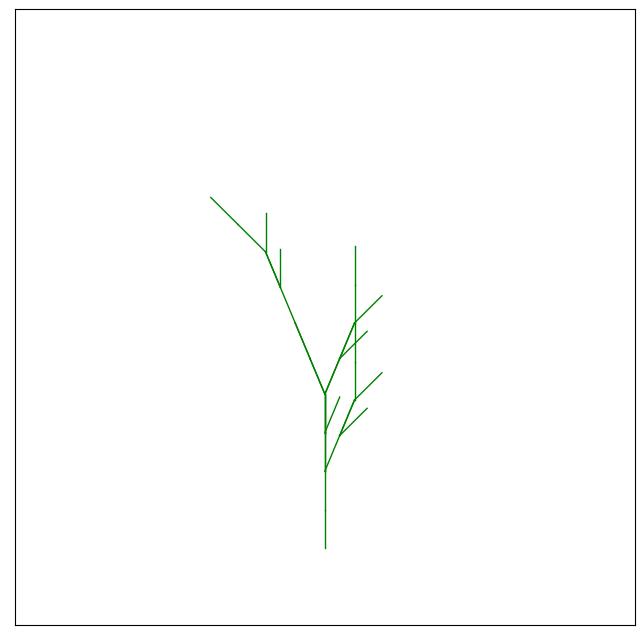

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.axis([0, 8, 0, 8])
plt.xticks([])
plt.yticks([])
# 描画せずに移動する
def translate(state):
   th = state[1]
   x = state[0][0] + distance*np.cos(th)
   y = state[0][1] + distance*np.sin(th)
   return [[x, y],th]
   
# distance だけ描画して進む
def forward(state):
   th = state[1]
   x1 = state[0][0]
   y1 = state[0][1]
   x2 = x1 + distance*np.cos(th)
   y2 = y1 + distance*np.sin(th)
   plt.plot([x1, x2], [y1, y2], lw=1, color=drawcolor)
   return [[x2, y2],th]
# 向きを変える coef 1/0 左 / 右
def rotate(coef, state):
   th = state[1]
   th = th + coef*angle
   return [state[0], th]
   
# 亀を命令に従って動かす L , R は何もしない 亀の状態を返す
def turtle(command, state):
   if command == "A" or command == "B" or command == "F":
       state = forward(state)
   if command == "f":
       state = translate(state)
   if command == "+":
       state = rotate(1, state)
   if command == "-":
       state = rotate(-1, state)
   if command == "[":
       stack.append(state)
   if command == "]":
       state = stack.pop()
   return state
# 置き換え
def rewriting(initiator, generator, repeat):
   com = initiator
   for i in range(repeat):
       for rule in generator:
           str1 = rule[0]
           str2 = rule[1]
           com = com.replace(str1, str2)
   return com
# ここから定義
state = [[4, 1], np.pi/2]      # 亀の初期状態 出発点とはじめの向き
initiator = "A"
generator = {"F":"FF","A":"F-[[A]+A]+F[+FA]-A"}
angle = 22.5 / 180 * np.pi     # 回転角　度数法 -> 弧度法
drawcolor = 'green'
repeat = 2
distance = 2*(1/2)**repeat     # 1歩の長さ。ものによって変える
# 定義はここまで
stack = []
com = initiator
for i in tqdm(range(repeat)):
   com = com.translate(str.maketrans(generator))
for command in tqdm(com):
   state = turtle(command, state)
#plt.savefig("Lsystem2.png")
plt.show()